<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.255854,29.121670,22.620078,-0.049554,144.948047,144.997446,-0.049399
1,0.0,1.0,59.090501,29.392400,55.311067,-0.052289,153.741679,153.790589,-0.048910
2,0.0,2.0,45.837521,76.989133,48.343013,0.029706,181.199373,181.187944,0.011429
3,0.0,3.0,74.642521,56.571391,71.357090,0.033382,212.604384,212.579715,0.024669
4,0.0,4.0,43.089810,26.403341,59.959082,0.034341,139.486574,139.446421,0.040153
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.660343,52.947708,99.148651,-0.008071,184.748631,184.738477,0.010155
29996,999.0,26.0,85.166266,92.294536,21.542876,-0.040545,208.963134,208.996335,-0.033201
29997,999.0,27.0,21.042920,22.436949,96.001021,-0.057553,149.423338,149.472496,-0.049158
29998,999.0,28.0,42.450656,97.992235,33.852380,-0.005293,184.289977,184.261887,0.028090


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.255854,29.121670,22.620078,-0.049554,144.948047,144.997446,-0.049399
1,0.0,1.0,59.090501,29.392400,55.311067,-0.052289,153.741679,153.790589,-0.048910
2,0.0,2.0,45.837521,76.989133,48.343013,0.029706,181.199373,181.187944,0.011429
3,0.0,3.0,74.642521,56.571391,71.357090,0.033382,212.604384,212.579715,0.024669
4,0.0,4.0,43.089810,26.403341,59.959082,0.034341,139.486574,139.446421,0.040153
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.660343,52.947708,99.148651,-0.008071,184.748631,184.738477,0.010155
29996,999.0,26.0,85.166266,92.294536,21.542876,-0.040545,208.963134,208.996335,-0.033201
29997,999.0,27.0,21.042920,22.436949,96.001021,-0.057553,149.423338,149.472496,-0.049158
29998,999.0,28.0,42.450656,97.992235,33.852380,-0.005293,184.289977,184.261887,0.028090


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.255854  29.121670  22.620078  ...  144.948047  144.997446 -0.049399
      1.0    59.090501  29.392400  55.311067  ...  153.741679  153.790589 -0.048910
      2.0    45.837521  76.989133  48.343013  ...  181.199373  181.187944  0.011429
      3.0    74.642521  56.571391  71.357090  ...  212.604384  212.579715  0.024669
      4.0    43.089810  26.403341  59.959082  ...  139.486574  139.446421  0.040153
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.660343  52.947708  99.148651  ...  184.748631  184.738477  0.010155
      26.0   85.166266  92.294536  21.542876  ...  208.963134  208.996335 -0.033201
      27.0   21.042920  22.436949  96.001021  ...  149.423338  149.472496 -0.049158
      28.0   42.450656  97.992235  33.852380  ...  184.289977  184.261887  0.028090
      29.0   81.691115  78.868344  29.851689  ...  200.421760  200.408006  0.013754

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.255854  29.121670  22.620078  ...  144.948047  144.997446 -0.049399
      1.0    59.090501  29.392400  55.311067  ...  153.741679  153.790589 -0.048910
      2.0    45.837521  76.989133  48.343013  ...  181.199373  181.187944  0.011429
      3.0    74.642521  56.571391  71.357090  ...  212.604384  212.579715  0.024669
      4.0    43.089810  26.403341  59.959082  ...  139.486574  139.446421  0.040153
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.660343  52.947708  99.148651  ...  184.748631  184.738477  0.010155
      26.0   85.166266  92.294536  21.542876  ...  208.963134  208.996335 -0.033201
      27.0   21.042920  22.436949  96.001021  ...  149.423338  149.472496 -0.049158
      28.0   42.450656  97.992235  33.852380  ...  184.289977  184.261887  0.028090
      29.0   81.691115  78.868344  29.851689  ...  200.421760  200.408006  0.013754

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.255854,29.121670,22.620078,-0.049554,144.948047,144.997446,-0.049399
1,0.0,1.0,59.090501,29.392400,55.311067,-0.052289,153.741679,153.790589,-0.048910
2,0.0,2.0,45.837521,76.989133,48.343013,0.029706,181.199373,181.187944,0.011429
3,0.0,3.0,74.642521,56.571391,71.357090,0.033382,212.604384,212.579715,0.024669
4,0.0,4.0,43.089810,26.403341,59.959082,0.034341,139.486574,139.446421,0.040153
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.660343,52.947708,99.148651,-0.008071,184.748631,184.738477,0.010155
29996,999.0,26.0,85.166266,92.294536,21.542876,-0.040545,208.963134,208.996335,-0.033201
29997,999.0,27.0,21.042920,22.436949,96.001021,-0.057553,149.423338,149.472496,-0.049158
29998,999.0,28.0,42.450656,97.992235,33.852380,-0.005293,184.289977,184.261887,0.028090


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.255854  29.121670  22.620078  ...  144.948047  144.997446 -0.049399
      1.0    59.090501  29.392400  55.311067  ...  153.741679  153.790589 -0.048910
      2.0    45.837521  76.989133  48.343013  ...  181.199373  181.187944  0.011429
      3.0    74.642521  56.571391  71.357090  ...  212.604384  212.579715  0.024669
      4.0    43.089810  26.403341  59.959082  ...  139.486574  139.446421  0.040153
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.660343  52.947708  99.148651  ...  184.748631  184.738477  0.010155
      26.0   85.166266  92.294536  21.542876  ...  208.963134  208.996335 -0.033201
      27.0   21.042920  22.436949  96.001021  ...  149.423338  149.472496 -0.049158
      28.0   42.450656  97.992235  33.852380  ...  184.289977  184.261887  0.028090
      29.0   81.691115  78.868344  29.851689  ...  200.421760  200.408006  0.013754

[30000 rows x 7 columns]

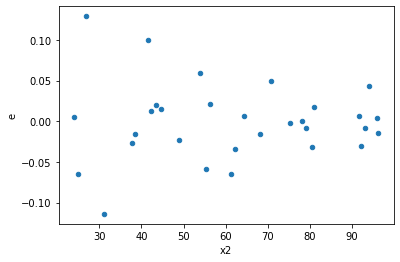

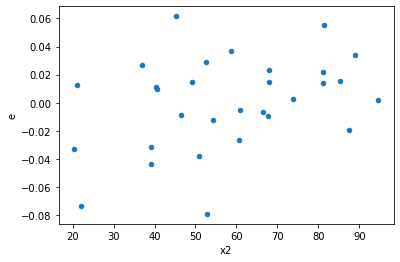

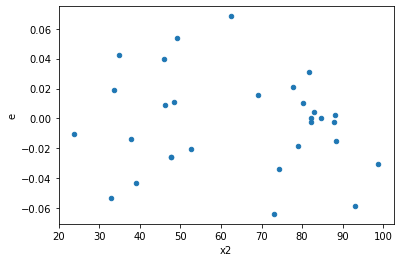

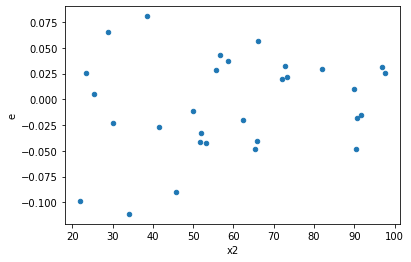

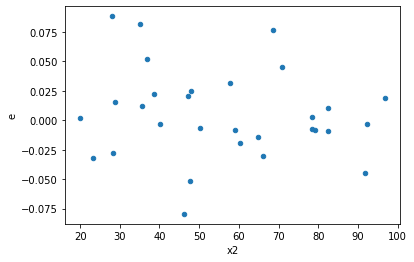

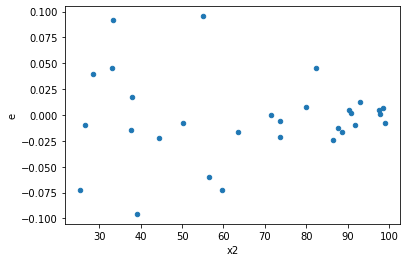

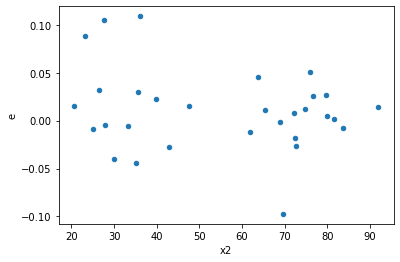

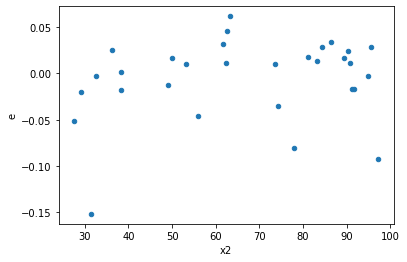

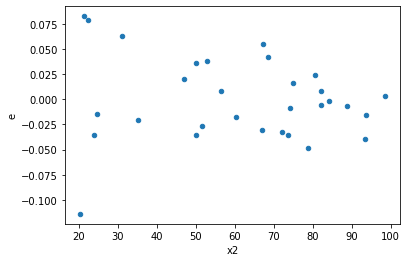

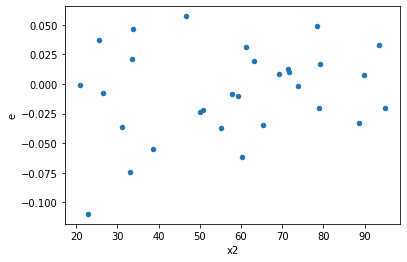

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
43.0,9.0,9.0,0.009613792561014951,0.0077661995423412965,0.0012017240701268689,0.0009707749427926621,1.2379018216826112,0.755733577290997,0.6221332113545015,Reject005=1 : Homoscedasticity
49.0,9.0,9.0,0.011547750374190173,0.010665603100566285,0.0014434687967737716,0.0013332003875707857,1.082709553815766,0.9077109539356227,0.5461445230321886,Reject005=1 : Homoscedasticity
116.0,9.0,9.0,0.007709190595716576,0.005580204161177501,0.000963648824464572,0.0006975255201471876,1.3815248283119859,0.6379713069120978,0.6810143465439511,Reject005=1 : Homoscedasticity
149.0,9.0,9.0,0.0105937284341816,0.0077219830211905606,0.0013242160542727,0.0009652478776488201,1.3718922205747455,0.6452352386499993,0.6773823806750003,Reject005=1 : Homoscedasticity
158.0,9.0,9.0,0.01088136306790836,0.008886433657228895,0.001360170383488545,0.001110804207153612,1.2244915663165545,0.7678119205823113,0.6160940397088444,Reject005=1 : Homoscedasticity
181.0,9.0,9.0,0.02087596321413242,0.017602727057829694,0.0026094954017665526,0.002200340882228712,1.1859505146872564,0.8036110207663905,0.5981944896168048,Reject005=1 : Homoscedasticity
217.0,9.0,9.0,0.011627099237975965,0.010475206226196087,0.0014533874047469957,0.0013094007782745109,1.1099637550714045,0.8790457748203837,0.5604771125898081,Reject005=1 : Homoscedasticity
236.0,9.0,9.0,0.009324236145526023,0.005893337780910928,0.001165529518190753,0.000736667222613866,1.5821655727469235,0.505053526998926,0.747473236500537,Reject005=1 : Homoscedasticity
370.0,9.0,9.0,0.009459207834075518,0.009128152351930686,0.0011824009792594397,0.0011410190439913358,1.036267523742065,0.9585481043793056,0.5207259478103472,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0035493574137059774,0.04126109561511059,0.0004436696767132472,0.005157636951888824,0.08602188964672415,0.001161408921786466,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,0.004830491728580725,0.009129746292075828,0.0006038114660725907,0.0011412182865094785,0.5290937528870168,0.35687667568671644,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.009763189213978729,0.031768216608659985,0.0012203986517473411,0.003971027076082498,0.30732569392382236,0.09366591185472616,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,0.004535564771360213,0.02387784553644179,0.0005669455964200267,0.0029847306920552236,0.18994866033613225,0.02112433656549914,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.004141438387564164,0.032025514584571806,0.0005176797984455205,0.004003189323071476,0.12931684131499604,0.005470129022318812,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,0.0022034724482238722,0.02861210762536309,0.00027543405602798403,0.003576513453170386,0.07701188871072934,0.0007502119323565388,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,0.004005760880981012,0.04724138758045459,0.0005007201101226265,0.005905173447556824,0.08479346365851317,0.0010976515404940814,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,0.0032324755443652524,0.038066092243732266,0.00040405944304565655,0.004758261530466533,0.0849174515647188,0.0011039709112331284,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.005860402865824064,0.025830453573595032,0.000732550358228008,0.003228806696699379,0.22687959578901132,0.037692535083333555,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      504
Reject005=0 : Heteroscedasticity    496
Name: Result_test, dtype: int64